# Machine Learning: Assignment #2

Bárbara Nóbrega Galiza – 202408654​

Cláudia Oliveira - 202005668​

Marta Campos - 202008344

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Diagnoses
diag = pd.read_csv('tables/DIAGNOSES_ICD.csv')

# Diagnoses and their descriptions
desc = pd.read_csv('tables/D_ICD_DIAGNOSES.csv')

top_codes = diag['ICD9_CODE'].value_counts().head(15).reset_index()
top_codes.columns = ['ICD9_CODE', 'count']

top_diseases = top_codes.merge(desc[['ICD9_CODE', 'SHORT_TITLE']], on='ICD9_CODE', how='left')

print(top_diseases)

   ICD9_CODE  count               SHORT_TITLE
0       4019  20703          Hypertension NOS
1       4280  13111                   CHF NOS
2      42731  12891       Atrial fibrillation
3      41401  12429  Crnry athrscl natve vssl
4       5849   9119  Acute kidney failure NOS
5      25000   9058  DMII wo cmp nt st uncntr
6       2724   8690    Hyperlipidemia NEC/NOS
7      51881   7497  Acute respiratry failure
8       5990   6555  Urin tract infection NOS
9      53081   6326         Esophageal reflux
10      2720   5930   Pure hypercholesterolem
11      V053   5779  Need prphyl vc vrl hepat
12      V290   5519    NB obsrv suspct infect
13      2859   5406                Anemia NOS
14      2449   4917        Hypothyroidism NOS


Load chartevents filtering by admissions with the disease chosen

In [ ]:
# Congestive heart failure
#d = diag[diag['ICD9_CODE'] == "4280"]
# All types of heart failure
diag['ICD9_CODE'] = diag['ICD9_CODE'].astype(str)
d = diag[diag['ICD9_CODE'].str.startswith('428')]

diagnoses_disease = d[d['SEQ_NUM'] == 1.0].copy()
hadm_ids = diagnoses_disease['HADM_ID'].unique()

chunksize = 100000 
filtered_chunks = []

for chunk in pd.read_csv('tables/CHARTEVENTS.csv', chunksize=chunksize, low_memory=False):
    chunk = chunk[chunk['HADM_ID'].isin(hadm_ids)]
    filtered_chunks.append(chunk)

chartevents_filtered = pd.concat(filtered_chunks)

In [3]:
print(len(diagnoses_disease))
len(chartevents_filtered)

1488


986502

### Data Preprocessing

Loading more datasets

In [ ]:
# Patient demographic information
patients = pd.read_csv('tables/PATIENTS.csv')

# Hospital admissions 
admissions = pd.read_csv('tables/ADMISSIONS.csv')

# ICU stays per patient admission
icustays = pd.read_csv('tables/ICUSTAYS.csv')

# Charted events: vital signs, lab results, nurse observations, etc.
#chartevents = pd.read_csv('tables/chart_4280.csv', low_memory=False)
#chartevents = pd.read_csv('tables/CHARTEVENTS.csv', low_memory=False)

# Dictionary that maps ITEMIDs to their names/descriptions
items = pd.read_csv('tables/D_ITEMS.csv')

inputevents = pd.read_csv('tables/INPUTEVENTS_MV.csv')

Adding comordibities. TODO: check for comorbidities that have code suffix 428 to not add them ?

In [5]:
diag_seq2 = diag[diag['SEQ_NUM'] == 2.0][['HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'comorbidity1'})
diagnoses_disease = diagnoses_disease.merge(diag_seq2, on='HADM_ID', how='left')
diagnoses_disease['comorbidity1'] = diagnoses_disease['comorbidity1'].fillna(0)

diag_seq2 = diag[diag['SEQ_NUM'] == 3.0][['HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'comorbidity2'})
diagnoses_disease = diagnoses_disease.merge(diag_seq2, on='HADM_ID', how='left')
diagnoses_disease['comorbidity2'] = diagnoses_disease['comorbidity2'].fillna(0)

diagnoses_disease.head(15)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,comorbidity1,comorbidity2
0,2154,175,176764,1.0,42831,51881,5070
1,2163,176,135828,1.0,4280,42731,4251
2,2172,177,143120,1.0,4280,51881,5119
3,2460,199,185360,1.0,4280,4254,4240
4,3596,305,122211,1.0,42820,99859,5070
5,2056,165,170252,1.0,42823,51881,49121
6,2516,205,135671,1.0,4280,4240,5990
7,4092,351,174800,1.0,4280,78057,6110
8,3775,323,106158,1.0,4280,99672,99762
9,3784,323,128132,1.0,4280,78551,51881


Percentage of the frequency explained by the top 5 comorbities: 38.91129032258064 %


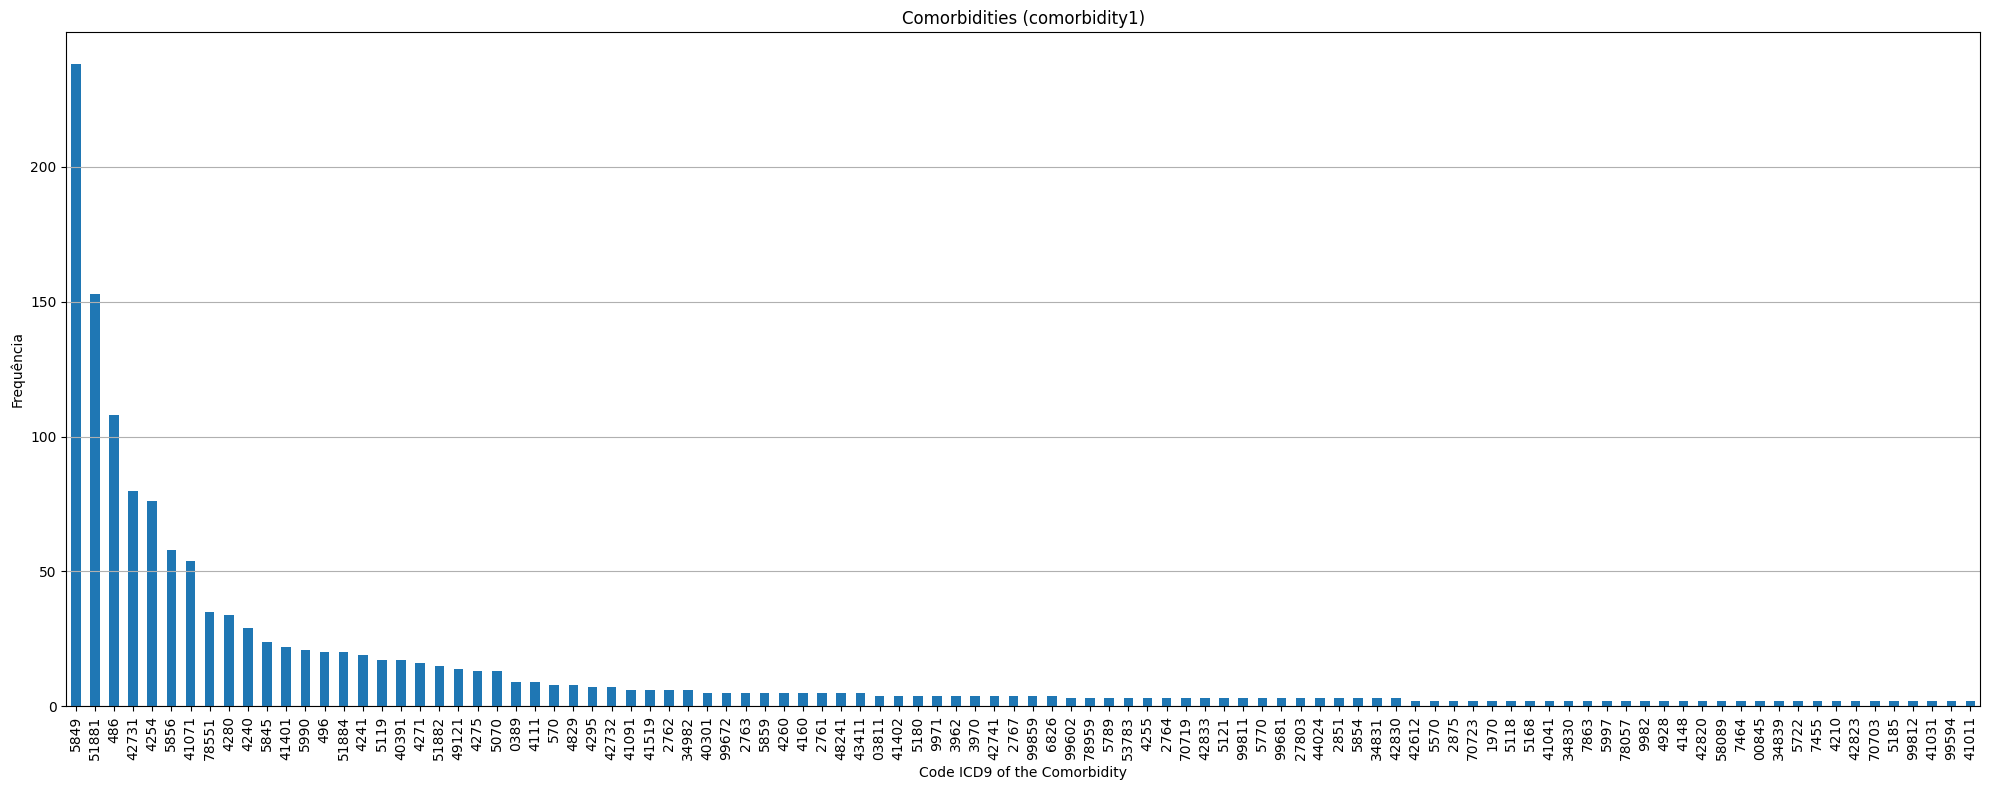

comorbidity1
5849     238
51881    153
486      108
42731     80
Name: count, dtype: int64

In [21]:
counts = diagnoses_disease['comorbidity1'].value_counts()

c1 = sum(counts[0:4])/sum(counts[:]) 
print("Percentage of the frequency explained by the top 5 comorbities: " + str(c1*100) + " %")

plt.figure(figsize=(20,8))
counts_plot = counts[0:100]
counts_plot.plot(kind='bar')
plt.title('Comorbidities (comorbidity1)')
plt.xlabel('Code ICD9 of the Comorbidity')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

counts[0:4]

Percentage of the frequency explained by the top 5 comorbities2: 22.513440860215052 %


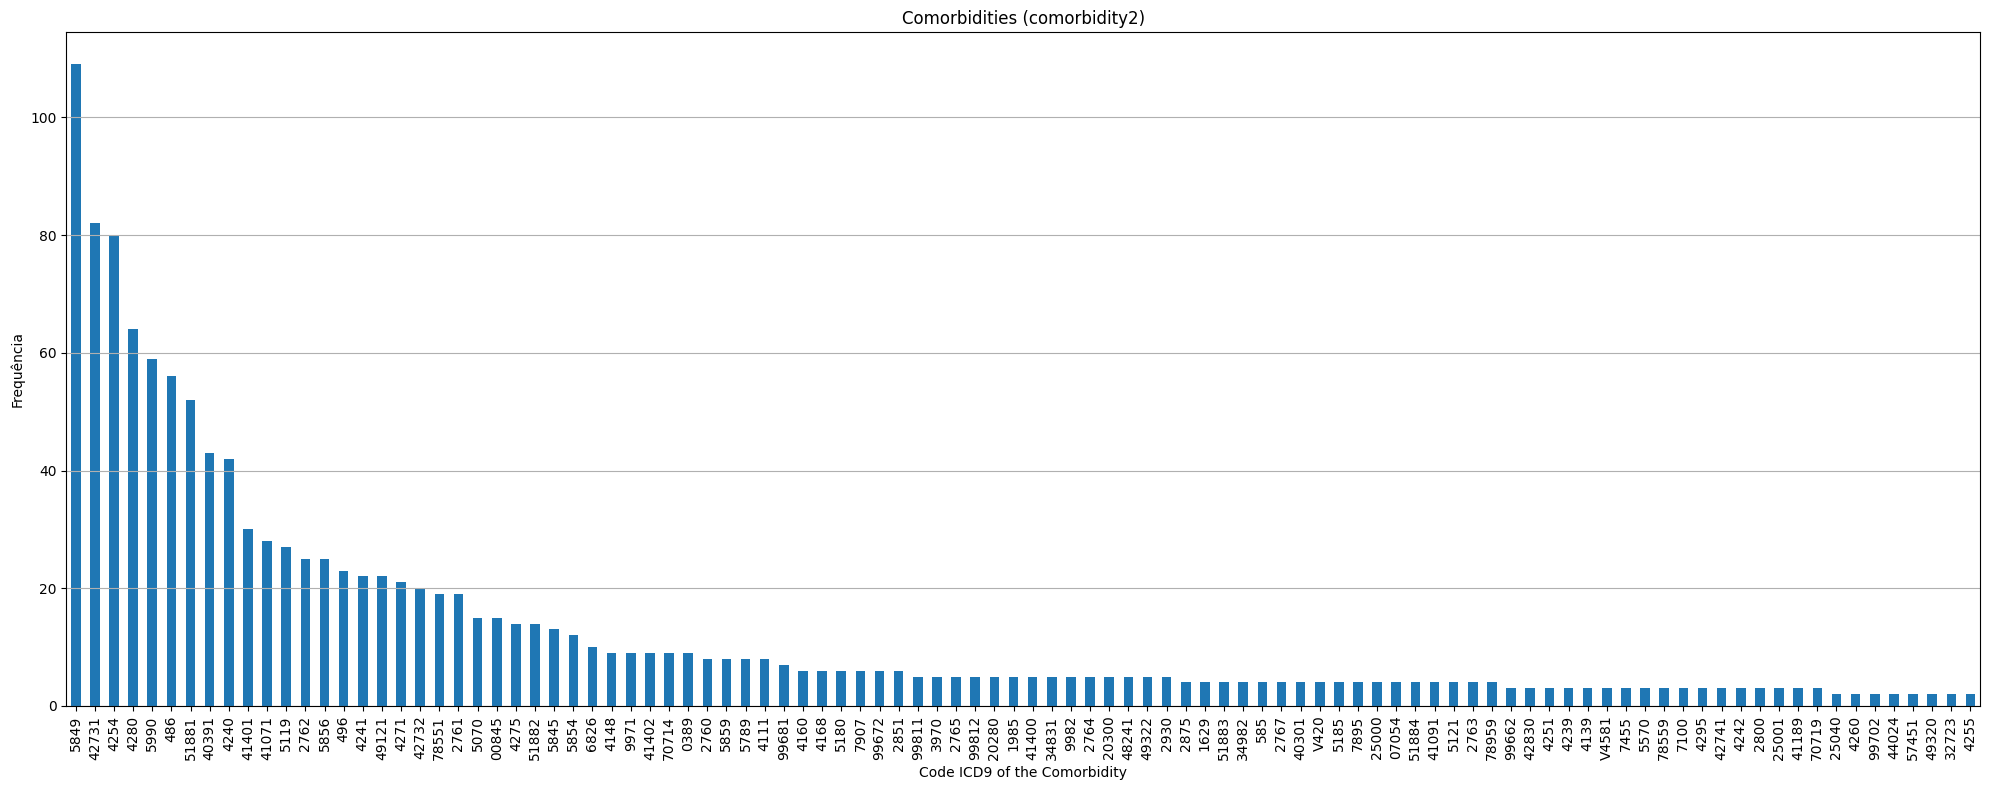

comorbidity2
5849     109
42731     82
4254      80
4280      64
Name: count, dtype: int64

In [23]:
counts = diagnoses_disease['comorbidity2'].value_counts()

c1 = sum(counts[0:4])/sum(counts) 
print("Percentage of the frequency explained by the top 5 comorbities2: " + str(c1*100) + " %")

plt.figure(figsize=(20,8))
counts_plot = counts[0:100]
counts_plot.plot(kind='bar')
plt.title('Comorbidities (comorbidity2)')
plt.xlabel('Code ICD9 of the Comorbidity')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

counts[0:4]

In [ ]:
print(f"Columns of Diagnosis: {diag.columns} \n")
print(f"Columns of Description of Diseases: {desc.columns} \n")
print(f"Columns of ICU Stays: {icustays.columns} \n")
print(f"Columns of Chart Events: {chartevents_filtered.columns} \n")
print(f"Columns of Patients: {patients.columns} \n")
print(f"Columns of Admissions: {admissions.columns} \n")

Columns of Diagnosis: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object') 

Columns of Description of Diseases: Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object') 

Columns of ICU Stays: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object') 

Columns of Chart Events: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME',
       'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING',
       'ERROR', 'RESULTSTATUS', 'STOPPED'],
      dtype='object') 

Columns of Patients: Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object') 

Columns of Admissions: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHAR

### Data Preparation

In [25]:
dataset = icustays[['ICUSTAY_ID', 'SUBJECT_ID', 'HADM_ID', 'LOS']]

print(len(dataset))

dataset = dataset.merge(admissions[['HADM_ID', 'ADMITTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']], on=['HADM_ID'], how='left')

print(len(dataset))

dataset = dataset.merge(patients[['SUBJECT_ID', 'GENDER', 'DOB']], on='SUBJECT_ID', how='left')

print(len(dataset))

dataset = dataset.merge(diagnoses_disease[["HADM_ID", "comorbidity1", "comorbidity2"]], on="HADM_ID", how="left")

print(len(dataset))

dataset = dataset.merge(chartevents_filtered[['ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUE', 'VALUENUM', 'VALUEUOM']], on=['ICUSTAY_ID'], how='left')

print(len(dataset))


dataset.columns

61532
61532
61532
61532
1047133


Index(['ICUSTAY_ID', 'SUBJECT_ID', 'HADM_ID', 'LOS', 'ADMITTIME',
       'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'GENDER', 'DOB', 'comorbidity1',
       'comorbidity2', 'ITEMID', 'CHARTTIME', 'VALUE', 'VALUENUM', 'VALUEUOM'],
      dtype='object')

In [27]:
print(len(dataset))
print(dataset.nunique())
dataset.isna().sum()

1047133
ICUSTAY_ID             61532
SUBJECT_ID             46476
HADM_ID                57786
LOS                    40175
ADMITTIME              57500
ADMISSION_TYPE             4
ADMISSION_LOCATION         9
INSURANCE                  5
RELIGION                  20
MARITAL_STATUS             7
ETHNICITY                 41
GENDER                     2
DOB                    32523
comorbidity1             212
comorbidity2             279
ITEMID                   760
CHARTTIME             123621
VALUE                   6690
VALUENUM                4955
VALUEUOM                  76
dtype: int64


ICUSTAY_ID                 0
SUBJECT_ID                 0
HADM_ID                    0
LOS                       10
ADMITTIME                  0
ADMISSION_TYPE             0
ADMISSION_LOCATION         0
INSURANCE                  0
RELIGION                1642
MARITAL_STATUS         16251
ETHNICITY                  0
GENDER                     0
DOB                        0
comorbidity1           60527
comorbidity2           60527
ITEMID                 60665
CHARTTIME              60665
VALUE                  65807
VALUENUM              119780
VALUEUOM              157840
dtype: int64

In [29]:
# 1. Converte 'ADMITTIME' e 'DOB' para datetime (com erros forçados como NaT)
dataset['ADMITTIME'] = pd.to_datetime(dataset['ADMITTIME'], errors='coerce')
dataset['DOB'] = pd.to_datetime(dataset['DOB'], errors='coerce')

dataset['AGE'] = None

def safe_calculate_age(row):
    try:
        if pd.isna(row['ADMITTIME']) or pd.isna(row['DOB']):
            return None
        if row['DOB'].year > 2200:
            return 89
        age = (row['ADMITTIME'] - row['DOB']).days / 365.242
        return 89 if age > 89 else age
    except Exception as e:
        return None

dataset['AGE'] = dataset.apply(safe_calculate_age, axis=1)

dataset['AGE'] = dataset['AGE'].fillna(200).astype(int)
dataset = dataset[dataset['AGE'] != 200]

# 5. (opcional) dropa as colunas DOB e ADMITTIME
dataset.drop(columns=['DOB', 'ADMITTIME'], inplace=True)

# Verifica
print(dataset[['SUBJECT_ID', 'AGE']].head())

   SUBJECT_ID  AGE
0         268   65
1         269   40
2         270   80
3         271   45
4         272   67


In [ ]:
print(len(dataset))

972416


In [14]:
print(pd.unique(dataset.ITEMID.dropna().astype(int)))
dataset.ITEMID.nunique()

[   212    456    550    642    644    646    663    674    677    678
    680    704    707    723    742   1046   1087   1125   1337   1425
   1622   1623    159    161    211    581    618    807    593    599
    617    637    660    733    763    446    467    470    522    524
    525    527   1044   1045   1089    113    238    283    324    813
     27     31     32     54     72     80     82     83     84     85
     86     87     88    154    165    166    167    168    169    170
    171    172    184    198    210    344    357    363    374    375
    425    428    432    454    477    478    479    547    621     69
    762    916    917    919    920    924    925    926    927    930
    935    230    232    345    356    580    582    640    781    784
    787    788    791    811    814    821    827    828    829    833
    837    855    861   1127   1162   1523   1525   1529   1532   1534
   1535   1536   1542   1484     52    128     77    139   7914    187
    19

752

In [58]:
dataset = dataset.merge(items[["LABEL", "ITEMID"]], on="ITEMID", how="left")

In [ ]:
#dataset[['LABEL', 'ITEMID', 'VALUE', 'SUBJECT_ID']].to_csv('items_processed.csv', index=False)

In [59]:
dataset['LABEL'] = dataset['LABEL'].str.lower()
print(len(dataset[dataset['LABEL'] == "heart rate"]))
print(dataset[dataset['LABEL'] == "heart rate"]["ICUSTAY_ID"].nunique())
result = dataset[dataset['LABEL'] == "heart rate"].groupby('SUBJECT_ID')['ITEMID'].unique()
result

6764
70


SUBJECT_ID
176         [211.0]
177         [211.0]
199         [211.0]
205         [211.0]
323         [211.0]
            ...    
95325    [220045.0]
96094    [220045.0]
97649    [220045.0]
98182    [220045.0]
99067    [220045.0]
Name: ITEMID, Length: 65, dtype: object

In [63]:
label_counts = dataset.groupby('LABEL')['ICUSTAY_ID'].nunique().reset_index(name='count')
label_counts = label_counts.sort_values(by='count', ascending=False)
print(label_counts)
sum(label_counts["count"])

          LABEL  count
226  hemoglobin     89
89          bun     83
598         wbc     83
133  creatinine     83
269         inr     79
..          ...    ...
3       abi (r)      1
2       abi (l)      1
0         aado2      1
602      zzo2av      1
603     zzo2avi      1

[604 rows x 2 columns]


8315

Preprocessing Items table. Needed because a lot of the same items are duplicated with different ITEMIDs. Example: heart rate

In [17]:
print(items[items['ITEMID'] == 211].LABEL)
print(items[items['ITEMID'] == 220045].LABEL)

print("\n")

print(len(items))
items['LABEL'].nunique()

475    Heart Rate
Name: LABEL, dtype: object
11498    Heart Rate
Name: LABEL, dtype: object


12487


11846

In [ ]:
items['LABEL'] = items['LABEL'].str.lower()
items['LABEL'].nunique()
#items.to_csv('items_processed.csv', index=False)

In [ ]:
vitals_labs = ['heart rate', 'systolic bp', 'diastolic bp', 'respiratory rate', 'SpO2', 'BNP', 'Creatinine', 'Sodium']

### Training and Validation

### Analysis of Results and Interpretation